# Check Ages

In [1]:
import pylab as plt

params = {
    'boxplot.boxprops.linewidth': 10.0,
    "figure.figsize": [8, 5],
    "axes.labelsize": 15,
    "axes.labelweight": "medium",
    "axes.titleweight": "medium",
    'legend.fontsize': 15,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "font.weight": "medium",
    # "text.usetex": True,
    "lines.linewidth": 1,
    "axes.titlesize": 15,
    # "font.family": "serif",
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    "ytick.right": True,
    "xtick.top": True,
    "ytick.direction": "in",
    "xtick.direction": "in",
    "ytick.major.size": 5,
    "ytick.major.width": 1,
    "ytick.minor.size": 3,
    "ytick.minor.width": 0.6,
    "xtick.major.size": 5,
    "xtick.major.width": 1,
    "xtick.minor.size": 3,
    "xtick.minor.width": 0.6,
}

plt.rcParams.update(params)

In [6]:
from astroNN.apogee import allstar, apogee_astronn
from astroNN.datasets import xmatch
from astropy.io import fits

astronn_VAC_f = fits.getdata(apogee_astronn(dr=17))

good_idx = ((np.abs(astronn_VAC_f['age_model_error']/astronn_VAC_f['age'])<.3) & (astronn_VAC_f['age']<20) & (astronn_VAC_f["LOGG_ERR"] < 0.1))

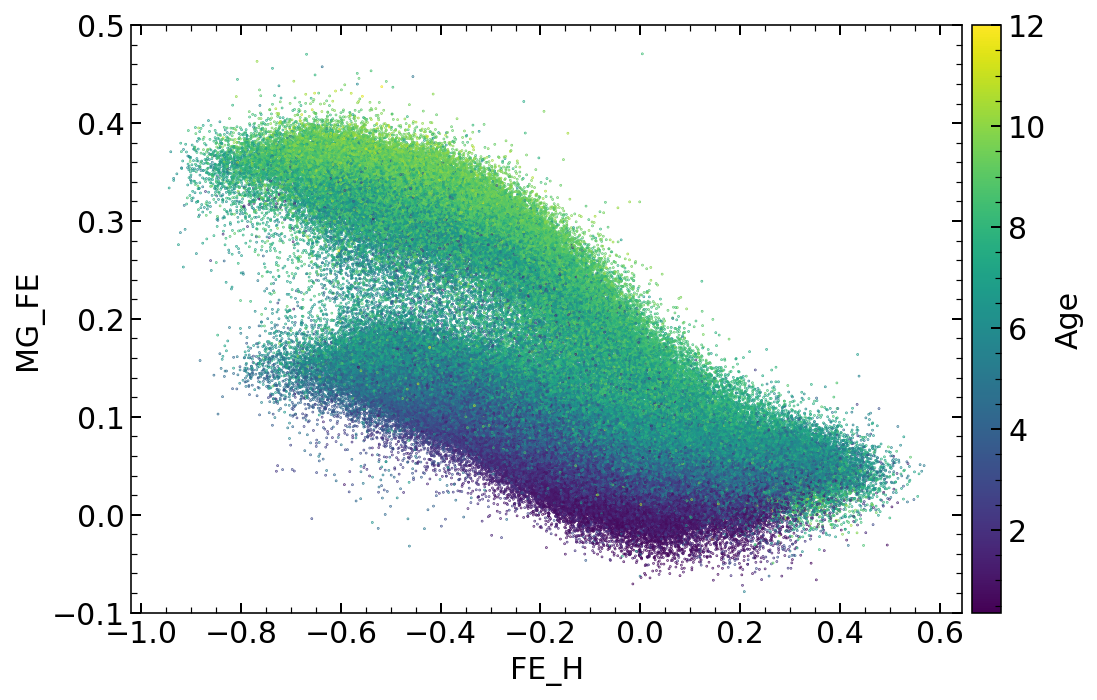

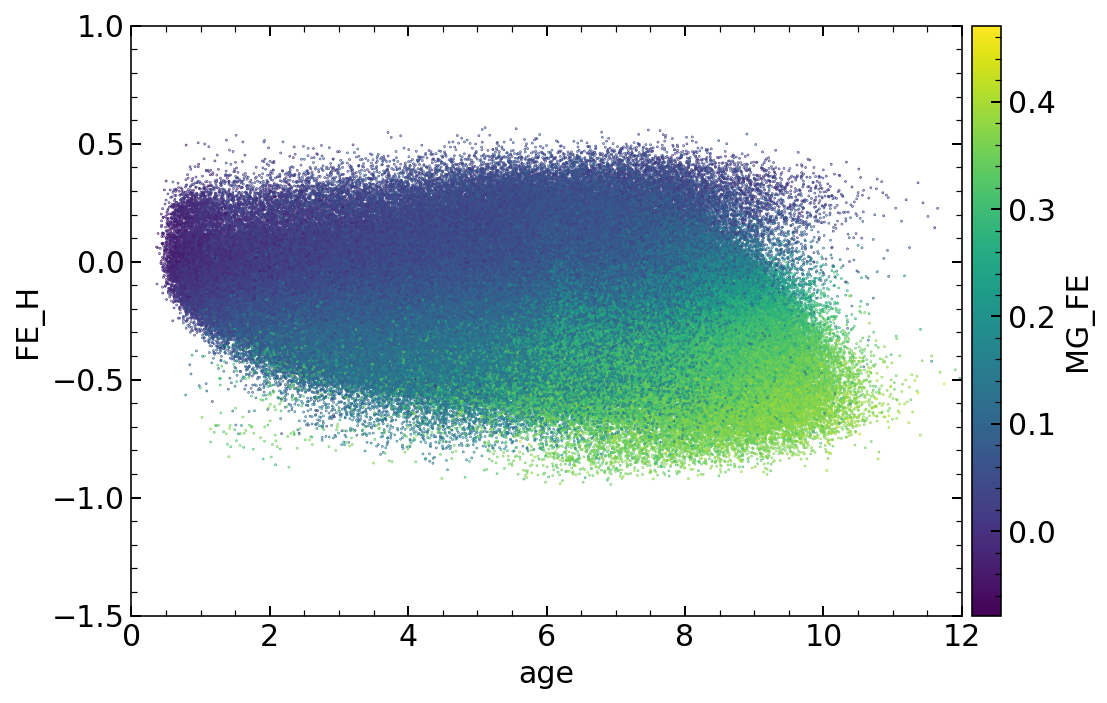

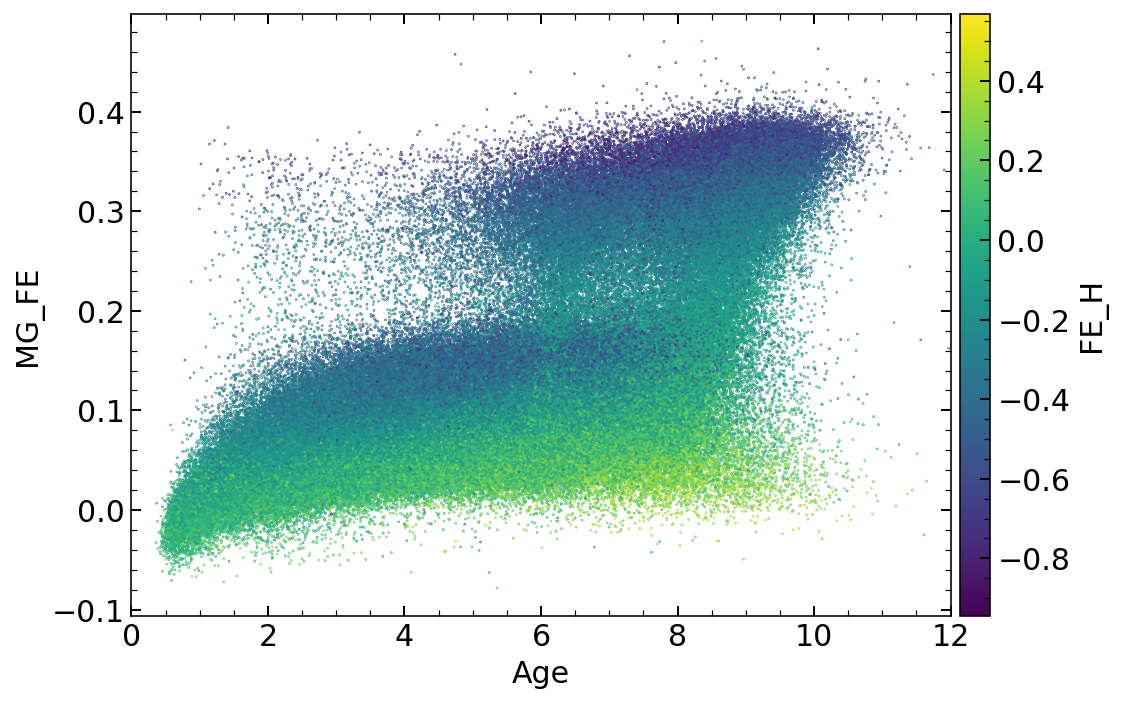

In [11]:
plt.scatter(astronn_VAC_f['FE_H'][good_idx], (astronn_VAC_f['MG_H'] - astronn_VAC_f['FE_H'])[good_idx], s=0.1, 
            c=np.clip(astronn_VAC_f['age'][good_idx], 0, 12))
plt.xlabel("FE_H")
plt.ylabel("MG_FE")
cbar = plt.colorbar(pad=0.01)
cbar.set_label("Age")
plt.ylim(-0.1, 0.5)
plt.tight_layout()

plt.figure()
plt.scatter(np.clip(astronn_VAC_f['age'][good_idx], 0, 12), astronn_VAC_f['FE_H'][good_idx], c=(astronn_VAC_f['MG_H'] - astronn_VAC_f['FE_H'])[good_idx], s=0.1)
plt.ylim(-1.5, 1.0)
plt.xlim(0, 12)
plt.xlabel("age")
plt.ylabel("FE_H")
cbar = plt.colorbar(pad=0.01)
cbar.set_label("MG_FE")
plt.tight_layout()

plt.figure()
plt.scatter(astronn_VAC_f['age'][good_idx], (astronn_VAC_f['MG_H'] - astronn_VAC_f['FE_H'])[good_idx], s=0.1, c=astronn_VAC_f['FE_H'][good_idx])
plt.xlabel("Age")
plt.ylabel("MG_FE")
plt.xlim(0, 12)
cbar = plt.colorbar(pad=0.01)
cbar.set_label("FE_H")
plt.tight_layout()